**Homework Set 1 by Ran Keyu, due by 3.22 Wed.**

In [1]:
# Initialization
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
df_training = pd.read_csv("../Dataset/Kaggle-Give-Me-Some-Data/cs-training.csv", index_col= 0)
df_training.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
# First, indentify missing values and fill in the missing values with column means.
df_training.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [4]:
df_training = df_training.fillna(df_training.mean())
df_training.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [5]:
# Second, standardilize the X_train and y_train.
X_train = df_training.iloc[:,1:]
y_train = df_training['SeriousDlqin2yrs']
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)

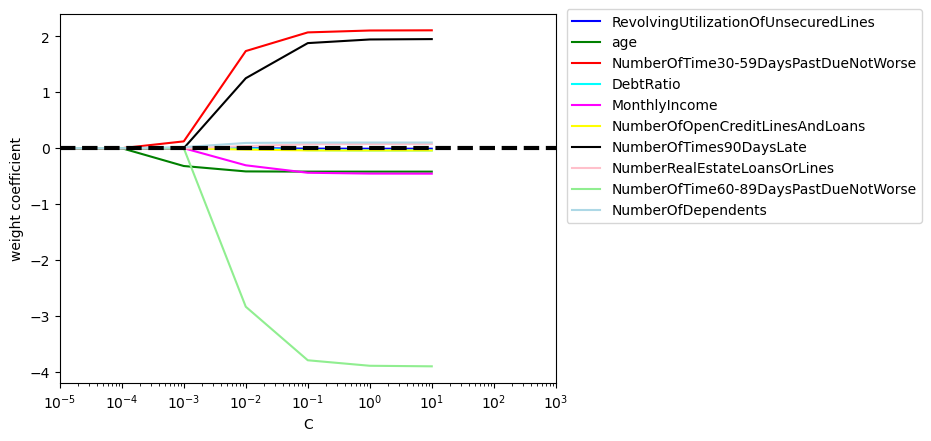

In [6]:
fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-5., 2.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_training.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**3])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

From the above figure, we find that features other than 'age' and 'NumberOfTime30-59DaysPastDueNotWorse' converge to 0 when C is less than 10^-3.
By etting the C as 8.0e-4, let's have a look at the weights of all features (random_state = 0).

In [7]:
lr2 = LogisticRegression(penalty='l1', C=8e-4, solver='liblinear', random_state=0)
lr2.fit(X_train_std, y_train)
lr2.coef_

array([[ 0.        , -0.28900905,  0.11514071,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

The result justfies that C=8e-4 is proper for this model.
In the following part, we only select the features 'age' and 'NumberOfTime30-59DaysPastDueNotWorse', and apply LR method to complete the model.

In [8]:
# Select only two features for convenience and set up the LR model.
X_sel_train_std = X_train_std[:,1:3]
lr_sel = LogisticRegression(penalty='l1', C=8e-4, solver='liblinear', random_state=0)
lr_sel.fit(X_sel_train_std, y_train)

LogisticRegression(C=0.0008, penalty='l1', random_state=0, solver='liblinear')

In [9]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

/tmp/ipykernel_19818/968489916.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


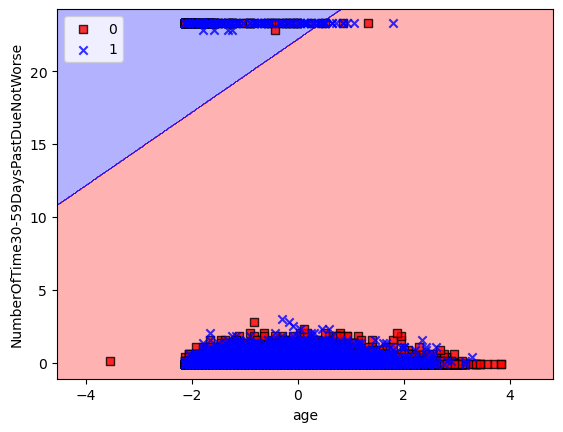

In [10]:
plot_decision_regions(X_sel_train_std, y_train, classifier=lr_sel)
plt.xlabel('age')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.legend(loc='upper left')

# plt.savefig('images/02_08.png', dpi=300)
plt.show()

In the following part, we want to tune our model by changing C in the LR model trying to maximize the accuracy.

In [11]:
# First, we check the accuracy of the above model where C=8e-4.
y_pred1 = lr_sel.predict(X_sel_train_std)
print('Accuracy: %.3f' % accuracy_score(y_train, y_pred1))

Accuracy: 0.933


Accuracy: 0.933


/tmp/ipykernel_19818/968489916.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


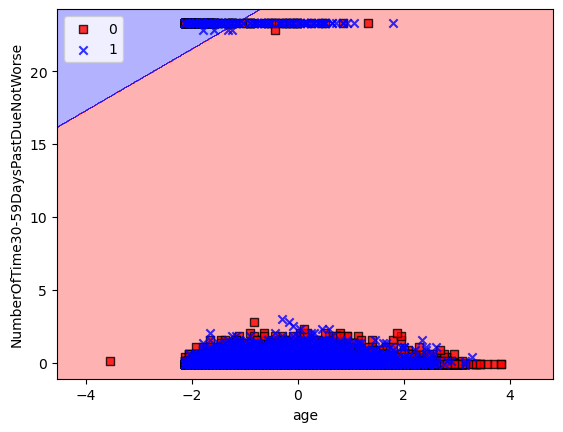

In [12]:
# Next, try C=5e-4.
lr_sel2 = LogisticRegression(penalty='l1', C=5e-4, solver='liblinear', random_state=0)
lr_sel2.fit(X_sel_train_std, y_train)

y_pred2 = lr_sel2.predict(X_sel_train_std)
print('Accuracy: %.3f' % accuracy_score(y_train, y_pred2))

plot_decision_regions(X_sel_train_std, y_train, classifier=lr_sel2)
plt.xlabel('age')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.legend(loc='upper left')
plt.show()

Accuracy: 0.933


/tmp/ipykernel_19818/968489916.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


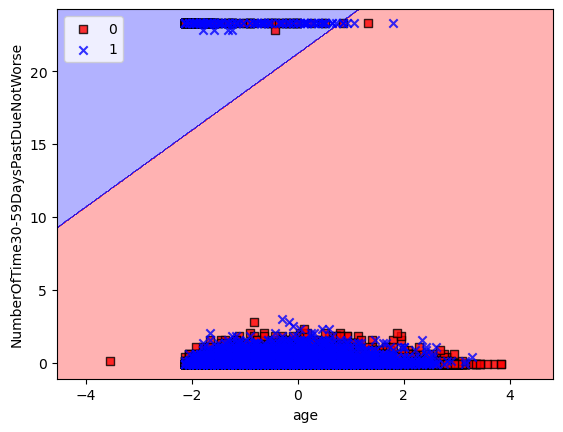

In [13]:
# Now try C=0.001
lr_sel3 = LogisticRegression(penalty='l1', C=0.001, solver='liblinear', random_state=0)
lr_sel3.fit(X_sel_train_std, y_train)

y_pred3 = lr_sel3.predict(X_sel_train_std)
print('Accuracy: %.3f' % accuracy_score(y_train, y_pred3))

plot_decision_regions(X_sel_train_std, y_train, classifier=lr_sel3)
plt.xlabel('age')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.legend(loc='upper left')
plt.show()

There's no significant improvement when changing C in the LR model. Before we try some other models, we'd better complete the prediction work using cs_test worksheet.

In [14]:
df_test = pd.read_csv('../Dataset/Kaggle-Give-Me-Some-Data/cs-test.csv', index_col=0)
X_test = df_test.iloc[:,2:4]
y_test = df_test['SeriousDlqin2yrs']
sc2 = StandardScaler()
sc2.fit(X_test)
X_test_std = sc2.transform(X_test)
X_test_std

array([[-0.63637603, -0.09998311],
       [ 0.31087024, -0.09998311],
       [ 0.44619113, -0.09998311],
       ...,
       [ 1.19045606, -0.09998311],
       [ 0.24320979, -0.09998311],
       [-1.5836223 , -0.09998311]])

/tmp/ipykernel_19818/968489916.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


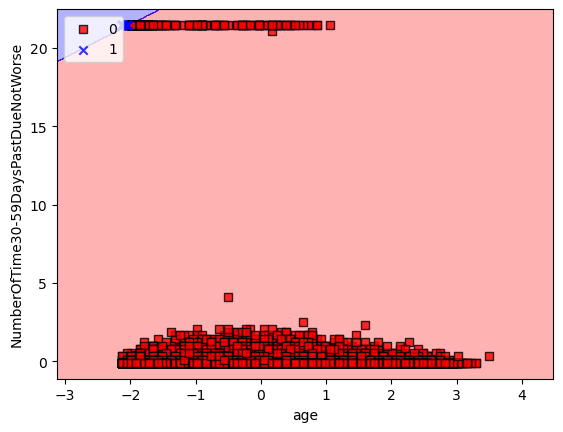

In [15]:
lr_test = LogisticRegression(penalty='l1', C=5e-4, solver='liblinear', random_state=0)
lr_test.fit(X_sel_train_std, y_train)

y_pred_test = lr_test.predict(X_test_std)

plot_decision_regions(X_test_std, y_pred_test, classifier=lr_test)
plt.xlabel('age')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.legend(loc='upper left')
plt.show()

Now let's have a look at some other models.

First, we try SVM with linaer kernel and C=10.

Accuracy: 0.933


/tmp/ipykernel_19818/968489916.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


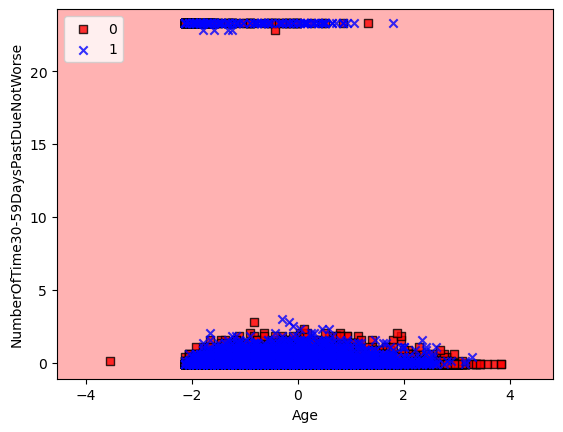

In [16]:
svm = SVC(kernel='linear', C=10, random_state=1)
svm.fit(X_sel_train_std, y_train)

svm_pred1 = svm.predict(X_sel_train_std)
print('Accuracy: %.3f' % accuracy_score(y_train, svm_pred1))

plot_decision_regions(X_sel_train_std, y_train, classifier=svm)
plt.xlabel('Age')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.legend(loc='upper left')
plt.show()

Second, we try SVM with linaer kernel and C=50.

Accuracy: 0.933


/tmp/ipykernel_19818/968489916.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


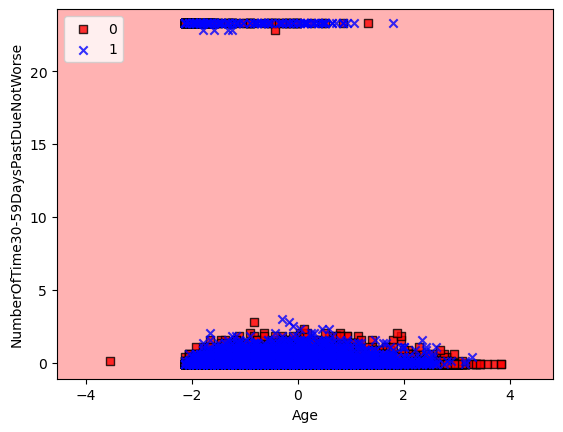

In [17]:
svm2 = SVC(kernel='linear', C=50, random_state=1)
svm2.fit(X_sel_train_std, y_train)

svm_pred2 = svm2.predict(X_sel_train_std)
print('Accuracy: %.3f' % accuracy_score(y_train, svm_pred2))

plot_decision_regions(X_sel_train_std, y_train, classifier=svm2)
plt.xlabel('Age')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.legend(loc='upper left')
plt.show()

It seems that there's much difference between these two models.

Now let's try decision tree model. Similar to the previous steps, we try decision tree model with gini criterion and max_depth=5. 

Accuracy: 0.933


/tmp/ipykernel_19818/968489916.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


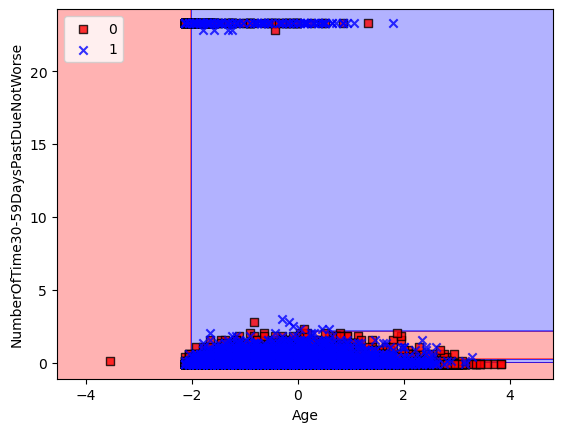

In [18]:
tree1 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
tree1.fit(X_sel_train_std, y_train)

tree_pred1 = tree1.predict(X_sel_train_std)
print('Accuracy: %.3f' % accuracy_score(y_train, tree_pred1))

plot_decision_regions(X_sel_train_std, y_train, classifier=tree1)
plt.xlabel('Age')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.legend(loc='upper left')
plt.show()

Again, let's try max_depth = 10.

Accuracy: 0.934


/tmp/ipykernel_19818/968489916.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


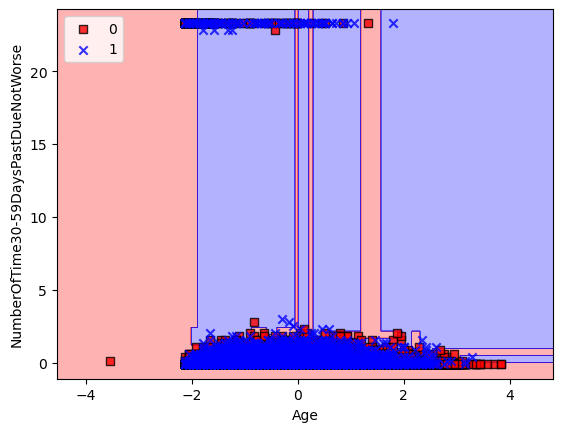

In [19]:
tree2 = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)
tree2.fit(X_sel_train_std, y_train)

tree_pred2 = tree2.predict(X_sel_train_std)
print('Accuracy: %.3f' % accuracy_score(y_train, tree_pred2))

plot_decision_regions(X_sel_train_std, y_train, classifier=tree2)
plt.xlabel('Age')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.legend(loc='upper left')
plt.show()

We find that tree decision model with max_depth=10 has a higher accuracy.

We can then do some prediction using cs-test dataset as we've done in the previous part.